# Data Visualization

## Types of Visualizations based on their use cases:

1) Distribution Visualizations
    - Violin Plot
    - Box Plot
    - Histogram
2) Relationship Visualizations
    - Scatter Plots
    - Scatter Plots
    - Sankey Diagrams
    - Bubble Plots
3) Comparision Visualizations
    - Scatter Plot
    - Pair Plot
    - Bar Plot
4) Trend Visualizations
    - Line Chart
    - Area Chart
    - Time Series Plot
5) Composition VIsualizations
    - Pie Chart
    - Donut Chart
    - Stacked Area/Bar Chart
6) Geospatial Visualization
    - Geospatial Heatmap
    - Point Map/Scatter Geo
7) Multivariate Visualizations
    - glyph plots
    - Parallel Coordinate Plots


## Data Visualization Tools:

1) Matplotlib
2) Seaborn
3) Plotly
4) Altair

## 1. Matplotlib

Matplotlib is one of the oldest and most widely used Python libraries for data visualization. Initially developed by John D. Hunter in 2003, it mimics MATLAB-style plotting, making it popular among researchers and engineers transitioning from MATLAB to Python.  

Matplotlib provides a full-fledged object-oriented API for embedding plots into applications. It supports the creation of static, interactive, and animated visualizations, ranging from simple line plots to complex 3D visualizations (via mpl_toolkits.mplot3d).  
  
### Key Capabilities and Features:
- 2D and limited 3D plotting capabilities.
- Highly customizable visuals with control over every component: axes, labels, ticks, legends, etc.
- Subplotting to display multiple plots in a single figure.
- Figure saving in high resolution for publications (PNG, PDF, SVG, etc.).
- Integration with NumPy, Pandas, and Jupyter Notebooks.
- Support for LaTeX-style formatting for text and equations.
- Simple animation tools using FuncAnimation.

### Practical Use Case Scenario
Scenario: Scientific Study on Iris Flowers
  
Imagine a scenario where a botanist is studying three species of Iris flowers — setosa, versicolor, and virginica. The scientist has measurements of sepal length, sepal width, petal length, and petal width for multiple samples of each species.
  
To analyze:
- Distribution of petal lengths
- Relationships between petal length and width
- Visual classification based on features
- Matplotlib can be used to create:
- Histograms to observe feature distributions
- Scatter plots to visualize inter-feature relationships
- Box plots to compare features across species

This makes it a powerful tool for exploratory data analysis (EDA) and pattern identification in biology, environmental science, and many other fields.

### Strengths and Weaknesses of Matplotlib

| Strengths                                        |   Weaknesses                                    |
| ------------------------------------------------ | ------------------------------------------------ |
| Fine-grained control over every visual element   | Verbose syntax for complex plots                 |
| Works seamlessly with Pandas, NumPy, SciPy, etc. | Steep learning curve for beginners               |
| Produces publication-quality figures             | Lack of interactivity in static plots            |
| Stable, mature library with wide adoption        | Poor default styling compared to newer libraries |
| Works offline and integrates well with IDEs      | 3D plotting is limited and less intuitive        |


In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load and prepare data
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

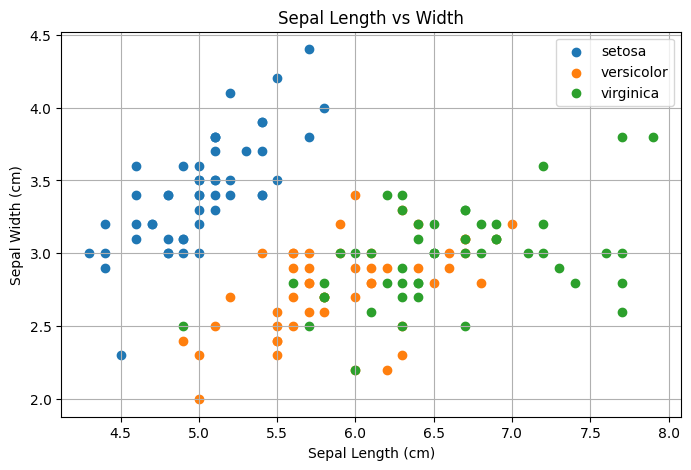

In [2]:
# Scatter Plot: Sepal Length vs Sepal Width
plt.figure(figsize=(8, 5))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], label=species)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Width')
plt.legend()
plt.grid(True)
plt.show()


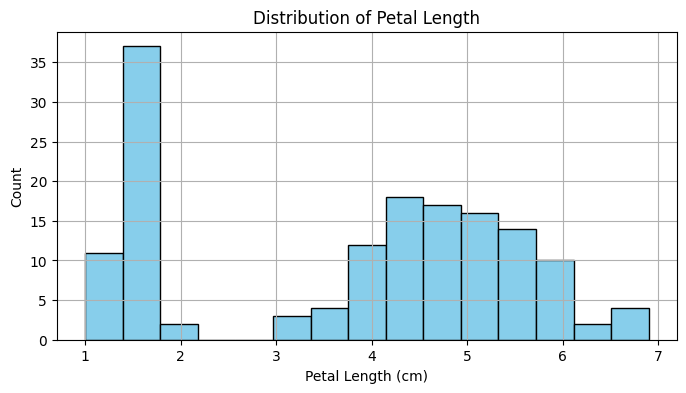

In [3]:
# Histogram: Distribution of Petal Length
plt.figure(figsize=(8, 4))
plt.hist(df['petal length (cm)'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

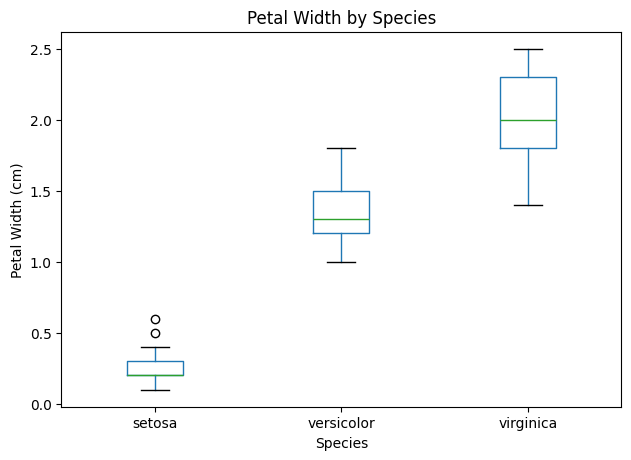

In [4]:
# Box Plot: Petal Width by Species
df.boxplot(column='petal width (cm)', by='species', figsize=(7, 5))
plt.title('Petal Width by Species')
plt.suptitle('')  # Removes the default title
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.grid(False)
plt.show()


## 2. Seaborn

Seaborn is a Python data visualization library built on top of Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics with minimal code. Seaborn is tightly integrated with Pandas and NumPy, making it ideal for working with DataFrames.
  
Unlike Matplotlib, which emphasizes fine-grained control, Seaborn focuses on simplicity and aesthetics, allowing you to create beautiful, context-rich plots in just a few lines of code.

### Key Capabilities and Features:
- High-level abstraction for statistical plots
- Integrated with Pandas DataFrames and categorical variables
- Comes with default themes and color palettes
- Automatic grouping and aggregation of data
- Built-in functions for common tasks:
- scatterplot(), lineplot(), boxplot(), violinplot(), heatmap(), pairplot(), etc.
- Built-in support for multi-plot grids (e.g., FacetGrid, PairGrid)

### Practical Use Case Scenario
Scenario: Visual Exploratory Analysis for Machine Learning
- Before training a machine learning model, a data scientist uses Seaborn to:
- Explore pairwise relationships between features
- Understand feature distributions per class
- Detect outliers or skewed distributions
Using Seaborn on the Iris dataset, one can create a pairplot to visualize all feature combinations and color-code them by species — a crucial step in determining the linear separability of classes.
  
### Strengths and Weaknesses of Seaborn
|   Strengths                                            |   Weaknesses                                            |
| ------------------------------------------------------- | -------------------------------------------------------- |
| Produces attractive plots with minimal code             | Less customizable than Matplotlib for fine-tuned control |
| Excellent integration with Pandas                       | Limited 3D and interactive plot support                  |
| Powerful for statistical and categorical visualizations | Not ideal for real-time plotting or dynamic dashboards   |
| Supports visualizing confidence intervals automatically | Still relies on Matplotlib under the hood                |
| Ideal for EDA and pattern discovery                     | Advanced multi-axis customizations require extra effort  |




In [5]:
# Load and Prepare data for Seaborn
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


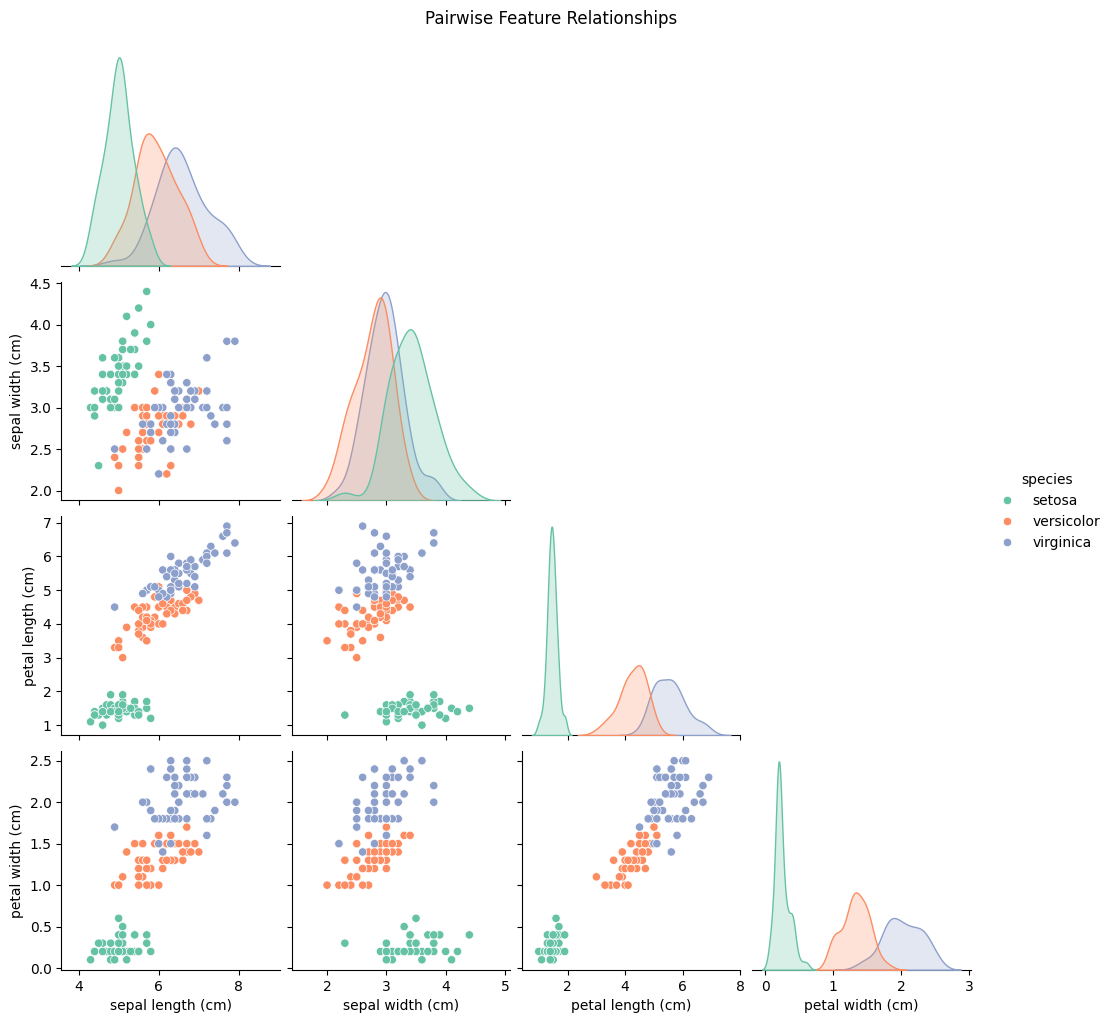

In [6]:
# Pairplot: Pairwise Relationships
sns.pairplot(df, hue='species', corner=True, diag_kind='kde', palette='Set2')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


C:\Users\meetb\AppData\Local\Temp\ipykernel_1832\1614872789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y='petal width (cm)', data=df, palette='pastel')


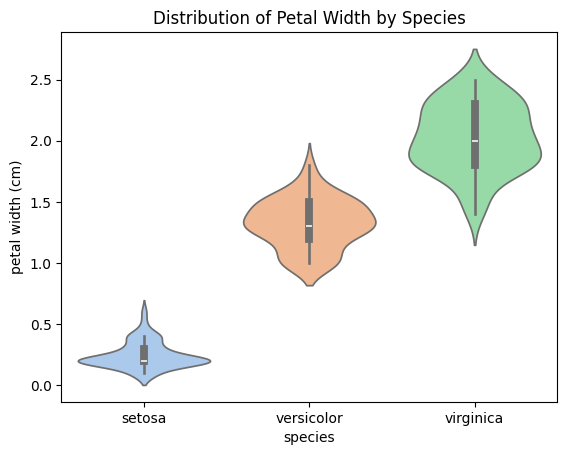

In [7]:
# Violin Plot: Petal Length Distribution by Species
sns.violinplot(x='species', y='petal width (cm)', data=df, palette='pastel')
plt.title('Distribution of Petal Width by Species')
plt.show()


C:\Users\meetb\AppData\Local\Temp\ipykernel_1832\2326087393.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal length (cm)', data=df, palette='muted')


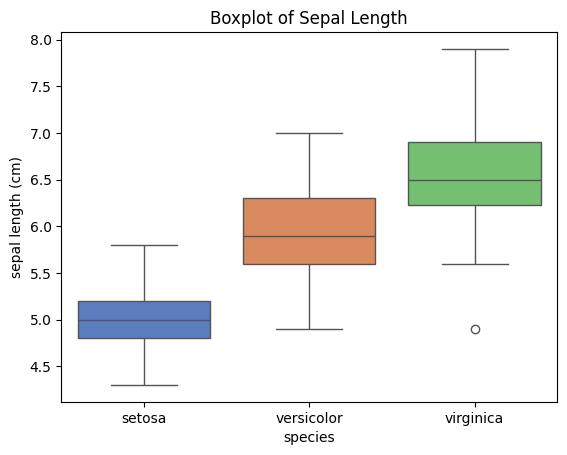

In [8]:
# Box Plot: Sepal Length by Species
sns.boxplot(x='species', y='sepal length (cm)', data=df, palette='muted')
plt.title('Boxplot of Sepal Length')
plt.show()


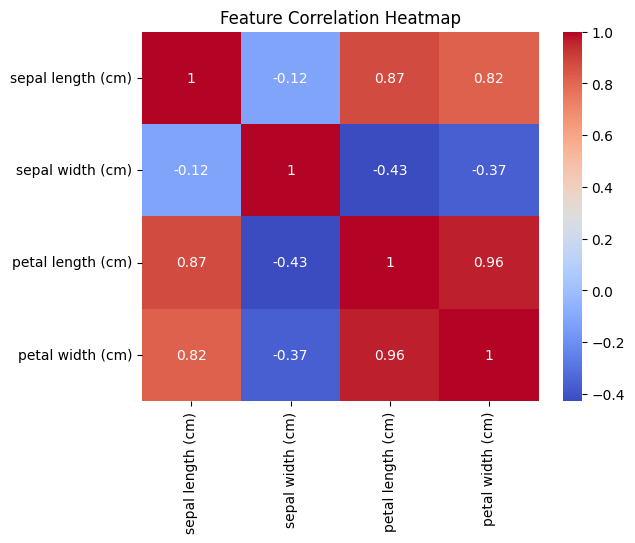

In [9]:
# Heatmap: Correlation Matrix
corr = df.iloc[:, :-1].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


## 3. Plotly

Plotly is a modern, interactive, open-source plotting library for Python, R, Julia, and JavaScript. It is known for producing web-based interactive visualizations with minimal effort and beautiful default styling. The Python library plotly.express provides a high-level wrapper for quickly creating interactive visualizations, while plotly.graph_objects offers more control and flexibility.
  
Unlike Matplotlib or Seaborn, which are static by default, Plotly visualizations support zooming, panning, hovering, tooltips, and dynamic axes, making them ideal for dashboards, reports, and presentations.

### Key Capabilities and Features:
- Create interactive and web-ready plots (HTML, dashboards, web apps)
- Rich range of chart types: scatter, bar, line, pie, box, violin, 3D plots, choropleths, maps, and more
- Built-in hover info, zoom, and click events
- Built-in export to HTML and images
- Integration with Dash for interactive dashboards
- Supports animations, faceting, and marginal plots
- Works seamlessly with Pandas DataFrames

### Practical Use Case Scenario
Scenario: Interactive Reporting in a Data Science Project
  
For a business analyst building a performance report of a machine learning model trained on the Iris dataset. Using Plotly, they can:
- Create interactive scatter plots with species separation
- Embed hoverable tooltips to explore values dynamically
- Share reports as self-contained HTML files without needing code
  
This makes Plotly extremely valuable in client presentations, executive summaries, and web-based reports.

### Strenghts and Weaknesses of Plotly
|   Strengths                           |   Weaknesses                                         |
| -------------------------------------- | ----------------------------------------------------- |
| Interactive, modern visualizations     | Slightly heavier for large datasets                   |
| Ideal for dashboards and web apps      | Less control than Matplotlib for static print visuals |
| Can export as HTML, PNG, PDF           | Requires internet browser to view interactivity       |
| High-level API is easy and intuitive   | Learning `graph_objects` can be verbose               |
| Great 3D and geo-visualization support | Custom animations can be tricky                       |


In [6]:
import plotly.express as px
from sklearn.datasets import load_iris
import pandas as pd
import plotly.io as pio

# Load data
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [11]:
pio.renderers.default = 'browser'

fig = px.scatter(
    df,
    x='petal length (cm)',
    y='petal width (cm)',
    color='species',
    title='Petal Length vs Width (Interactive)',
    hover_data=df.columns
)
fig.show()


In [12]:
# Box Plot: Sepal Width by Species
fig = px.box(
    df,
    x='species',
    y='sepal width (cm)',
    color='species',
    title='Box Plot of Sepal Width by Species'
)
fig.show()


## 4.Altair

Altair is a declarative statistical visualization library for Python, built on top of the powerful Vega-Lite visualization grammar. It emphasizes a declarative syntax, meaning users only specify what they want to visualize (not how), and Altair automatically decides the most effective rendering.

It’s highly concise, expressive, and suited for exploratory data analysis (EDA) and interactive graphics, especially when working with structured tabular data (like Pandas DataFrames).

### Key Capabilities and Features:
- Declarative syntax: concise, readable code
- Interactive charts with zoom, pan, filter, and hover
- Built-in support for statistical visualizations (scatter, line, bar, box, histograms)
- Supports layering, faceting, concatenation, and linked brushing
- JSON-exportable visualizations (great for web embedding)
- Integrates smoothly with Jupyter, VS Code notebooks, and web frameworks

### Practical Use Case Scenario
Scenario: Interactive Visual Data Exploration in Research

A data scientist working on species classification wants to visualize relationships between Iris flower measurements (like petal length vs width) and explore inter-class separability. Using Altair, they can quickly create a scatter plot where hovering shows data points, axes are interactive, and species are color-coded — all in under 10 lines of code.

This makes Altair a strong choice for researchers, educators, and analysts who want elegant, interactive visuals without complex boilerplate.

###  Strengths and Weaknesses of Altair

|   Strengths                                        |   Weaknesses                                            |
| --------------------------------------------------- | -------------------------------------------------------- |
| Declarative and highly readable syntax              | Limited support for large datasets (uses in-memory JSON) |
| Built-in interactivity (hover, zoom, pan)           | Fewer chart types than Plotly or Tableau                 |
| Automatic handling of axis scaling, legends, colors | Not ideal for real-time or streaming data                |
| Supports chart composition (layer, facet, repeat)   | Requires web rendering (HTML/JS-based)                   |
| Easy to link charts via interactions                | No 3D plotting or native animation support               |


In [1]:
#  Load and Prepare Data
import altair as alt
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


In [2]:
# Interactive Scatter Plot: Petal Length vs Width
chart = alt.Chart(df).mark_circle(size=60).encode(
    x='petal length (cm)',
    y='petal width (cm)',
    color='species',
    tooltip=['species', 'petal length (cm)', 'petal width (cm)']
).interactive().properties(
    title='Petal Length vs Width (Interactive Scatter)'
)

chart


alt.Chart(...)

In [3]:
# Box Plot: Sepal Length by Species
box = alt.Chart(df).mark_boxplot().encode(
    x='species:N',
    y='sepal length (cm):Q',
    color='species:N'
).properties(
    title='Sepal Length Distribution by Species'
)

box


alt.Chart(...)

In [4]:
# Faceted Scatter Plot: Petal vs Sepal Length, One for Each Species
facet_chart = alt.Chart(df).mark_point().encode(
    x='petal length (cm)',
    y='sepal length (cm)',
    color='species'
).facet(
    column='species:N'
).properties(
    title='Faceted Scatter Plots by Species'
)

facet_chart



alt.FacetChart(...)

## Tool Suitability Analysis: Selecting the Appropriate Visualization Tool

Different data visualization tools serve different purposes depending on the objectives, audience, and complexity of the dataset. The following analysis provides a comparative overview of four major tools—Matplotlib, Seaborn, Plotly, and Altair—highlighting which scenarios they are best suited for.

---

### 1. Matplotlib

**Recommended for:** Scientific publications, academic research, and use cases requiring fine-grained control.

**Use Case Scenarios:**
* Generating high-resolution, static plots suitable for academic journals and technical reports.
* Creating complex, customized visualizations such as subplots, dual axes, and embedded figures.
* Operating in offline or restricted environments with limited access to browsers or the internet.
* Integrating plots into GUI-based applications using frameworks like Tkinter or PyQt.

**Considerations:**
Matplotlib provides precise control over every visual element but often requires more verbose code. It is not inherently designed for interactivity, making it less suitable for exploratory tasks or presentations.

---

### 2. Seaborn

**Recommended for:** Exploratory data analysis and statistical visualization.

**Use Case Scenarios:**

* Quickly generating statistically rich visualizations such as box plots, violin plots, KDE plots, and categorical plots.
* Working directly with Pandas DataFrames and utilizing grouped or aggregated data.
* Visualizing patterns and distributions across categories using faceted plots.
* Producing aesthetically pleasing plots with minimal configuration.

**Considerations:**
Seaborn simplifies statistical plotting but lacks native interactivity. It is best used for initial data exploration and pattern discovery in notebook or script environments.

---

### 3. Plotly

**Recommended for:** Interactive visualizations, dashboards, and client-facing presentations.

**Use Case Scenarios:**

* Building web-based dashboards or reports that require interactive elements such as zooming, panning, and hover tooltips.
* Presenting data to non-technical stakeholders using visuals that are intuitive and self-explanatory.
* Developing dynamic visualizations, including 3D scatter plots, surface plots, and geographical maps.
* Integrating with Dash to build complete analytical applications.

**Considerations:**
Plotly excels in interactivity and presentation but may introduce additional complexity for static or print-ready plots. It is better suited for web environments and browser-based rendering.

---

### 4. Altair

**Recommended for:** Concise, interactive visualizations within notebooks and reports involving small to medium-sized datasets.

**Use Case Scenarios:**

* Creating clean, interactive plots with declarative syntax and minimal boilerplate code.
* Generating linked visualizations with features such as brushing, filtering, and faceting.
* Performing interactive data exploration directly within Jupyter or VS Code notebooks.
* Producing clear and readable visualizations suitable for educational content and explanatory reports.

**Considerations:**
Altair is optimized for structured tabular data and performs best with datasets under 5,000 rows. It is not designed for real-time or large-scale data visualization tasks.

Each tool has distinct strengths and ideal application contexts:

* **Matplotlib** is best suited for cases requiring full control and static output.
* **Seaborn** is effective for quick, statistical visualization with appealing default styles.
* **Plotly** is the preferred choice for interactive, presentation-ready plots and dashboards.
* **Altair** offers an elegant and concise approach for interactive plotting, particularly in exploratory or instructional settings.

Selecting the appropriate tool depends on the specific requirements of the project, including the target audience, the nature of the data, and the intended mode of communication.